# 비지도 학습과 데이터 전처리

- (개정판)파이썬 라이브러리를 활용한 머신러닝, 한빛미디어, 2019.
    - 3.3 데이터 전처리와 스케일 조정

## 공통

In [2]:
%config InlineBackend.figure_format = "retina"
%config InlineBackend.figure_formats = ["pdf", "svg"]

In [3]:
from preamble import *

## 데이터 전처리와 스케일링

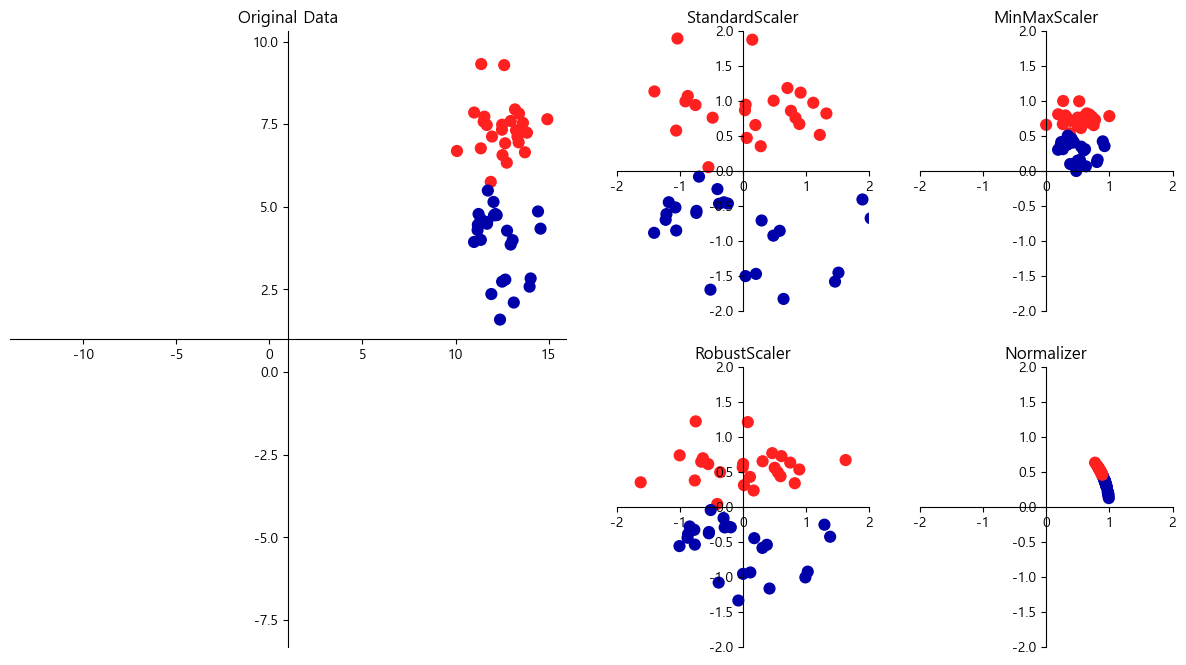

In [4]:
mglearn.plots.plot_scaling()

### 데이터 준비

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


### TRANS-Q1. MinMaxScaler
- TRANS-Q1(a). 학습 데이터를 MinMaxScaler로 변환하고 최소값과 최대값을 출력하세요.

변환된 후 크기: (426, 30)
스케일 조정 전 특성별 최소값:
 [  6.981   9.71   43.79  143.5     0.053   0.019   0.      0.      0.106
   0.05    0.115   0.36    0.757   6.802   0.002   0.002   0.      0.
   0.01    0.001   7.93   12.02   50.41  185.2     0.071   0.027   0.
   0.      0.157   0.055]
스케일 조정 전 특성별 최대값:
 [  28.11    39.28   188.5   2501.       0.163    0.287    0.427    0.201
    0.304    0.096    2.873    4.885   21.98   542.2      0.031    0.135
    0.396    0.053    0.061    0.03    36.04    49.54   251.2   4254.
    0.223    0.938    1.17     0.291    0.577    0.149]
스케일 조정 후 특성별 최소값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


- TRANS-Q1(b). 테스트 데이터를 MinMaxScaler로 변환하고 최소값과 최대값을 출력하세요.

스케일 조정 후 특성별 최소값:
 [ 0.034  0.023  0.031  0.011  0.141  0.044  0.     0.     0.154 -0.006
 -0.001  0.006  0.004  0.001  0.039  0.011  0.     0.    -0.032  0.007
  0.027  0.058  0.02   0.009  0.109  0.026  0.     0.    -0.    -0.002]
스케일 조정 후 특성별 최대값:
 [0.958 0.815 0.956 0.894 0.811 1.22  0.88  0.933 0.932 1.037 0.427 0.498
 0.441 0.284 0.487 0.739 0.767 0.629 1.337 0.391 0.896 0.793 0.849 0.745
 0.915 1.132 1.07  0.924 1.205 1.631]


### 훈련 데이터와 테스트 데이터의 스케일을 같은 방법으로 조정하기

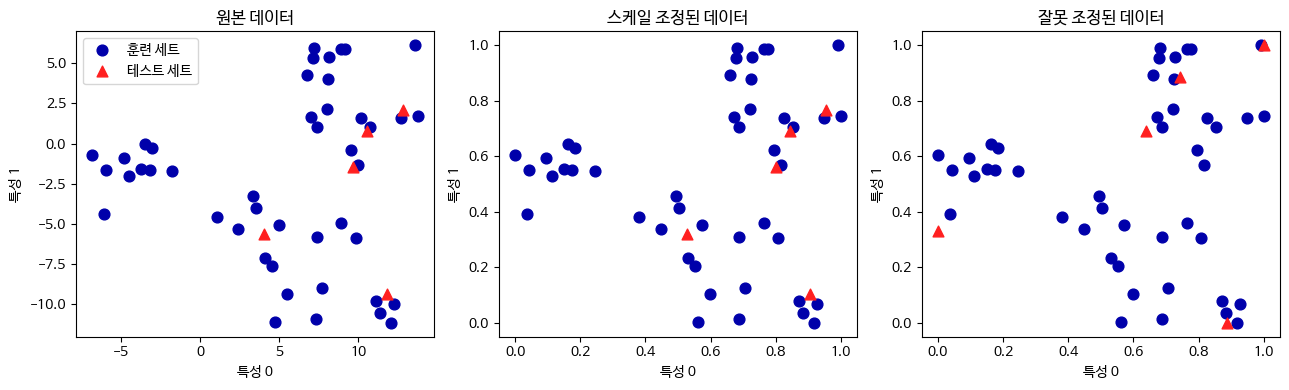

In [9]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# 훈련 세트와 테스트 세트의 산점도를 그립니다
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2.colors[0], label="훈련 세트", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2.colors[1], label="테스트 세트", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("원본 데이터")

# MinMaxScaler를 사용해 스케일을 조정합니다
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일이 조정된 데이터의 산점도를 그립니다
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2.colors[0], label="훈련 세트", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2.colors[1], label="테스트 세트", s=60)
axes[1].set_title("스케일 조정된 데이터")

# 테스트 세트의 스케일을 따로 조정합니다
# 테스트 세트의 최솟값은 0, 최댓값은 1이 됩니다
# 이는 예제를 위한 것으로 절대로 이렇게 사용해서는 안됩니다
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 잘못 조정된 데이터의 산점도를 그립니다
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2.colors[0], label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2.colors[1], label="test set", s=60)
axes[2].set_title("잘못 조정된 데이터")

for ax in axes:
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
fig.tight_layout()

### TRANS-Q2. StandardScaler

### TRANS-Q3. 지도 학습에서 데이터 전처리 효과

테스트 세트 정확도: 0.63


- TRANS-Q3(a). 학습 데이터를 Min/Max 스케일로 조정하고 정확도를 출력하세요.

스케일 조정된 테스트 세트의 정확도: 0.95


- TRANS-Q3(b). 학습 데이터를 StandardScaler로 변환하고 정확도를 출력하세요.

SVM 테스트 정확도: 0.97
